# HW 1


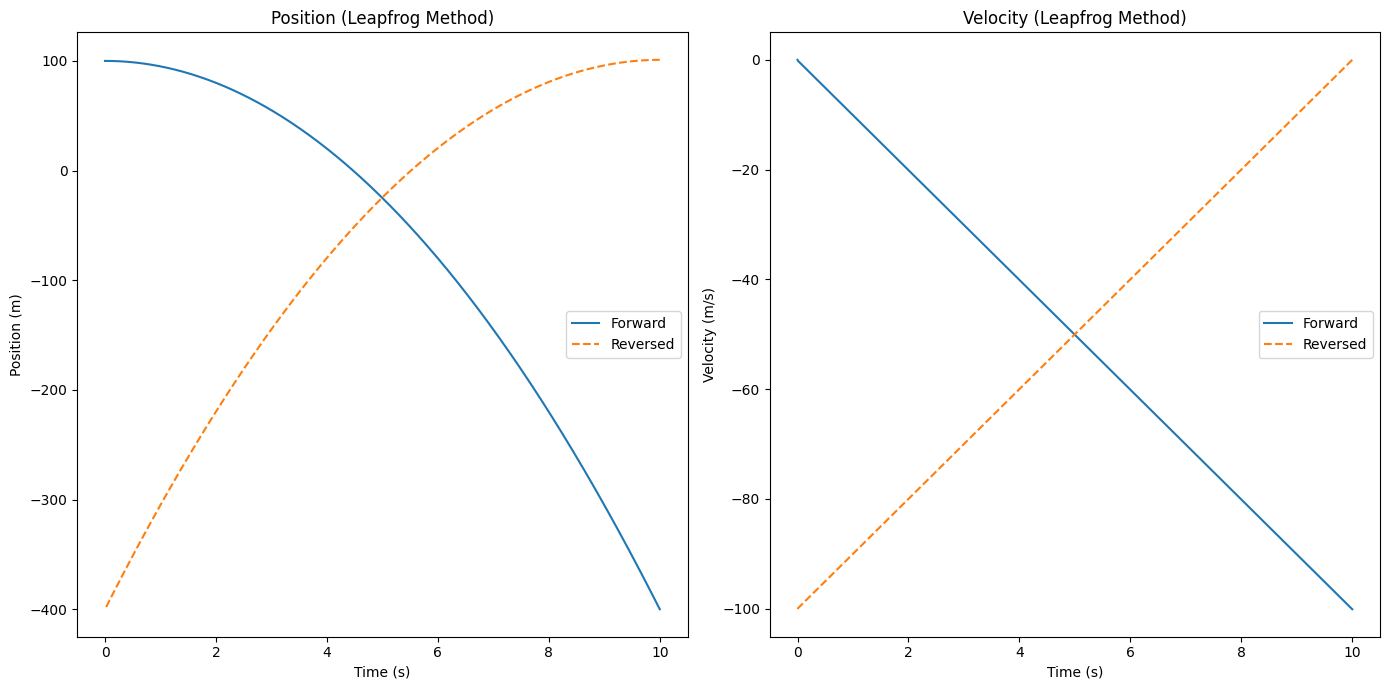

In [7]:
import numpy as np
import matplotlib.pyplot as plt

g = 10
x0 = 100
v0 = 0
t_final = 10
dt = 0.01

def leapfrog_corrected(x0, v0, g, t_final, dt):
    n_steps = int(t_final / dt)
    t = np.linspace(0, t_final, n_steps + 1)
    x = np.zeros(n_steps + 1)
    v = np.zeros(n_steps + 1)

    x[0] = x0
    v[0] = v0

    v_half = v0 - 0.5 * g * dt

    for i in range(n_steps):
        x[i + 1] = x[i] + v_half * dt
        v_half = v_half - g * dt
        if i < n_steps - 1:
            v[i + 1] = v_half - 0.5 * g * dt

    v[-1] = v_half - 0.5 * g * dt

    return t, x, v

t_forward, x_forward, v_forward = leapfrog_corrected(x0, v0, g, t_final, dt)

t_reverse, x_reverse, v_reverse = leapfrog_corrected(x_forward[-1], -v_forward[-1], g, t_final, dt)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(t_forward, x_forward, label='Forward')
plt.plot(t_reverse[::-1], x_reverse[::-1], label='Reversed', linestyle='--')
plt.title('Position (Leapfrog Method)')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t_forward, v_forward, label='Forward')
plt.plot(t_reverse[::-1], -v_reverse[::-1], label='Reversed', linestyle='--')
plt.title('Velocity (Leapfrog Method)')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.legend()

plt.tight_layout()
plt.show()

# HW 2

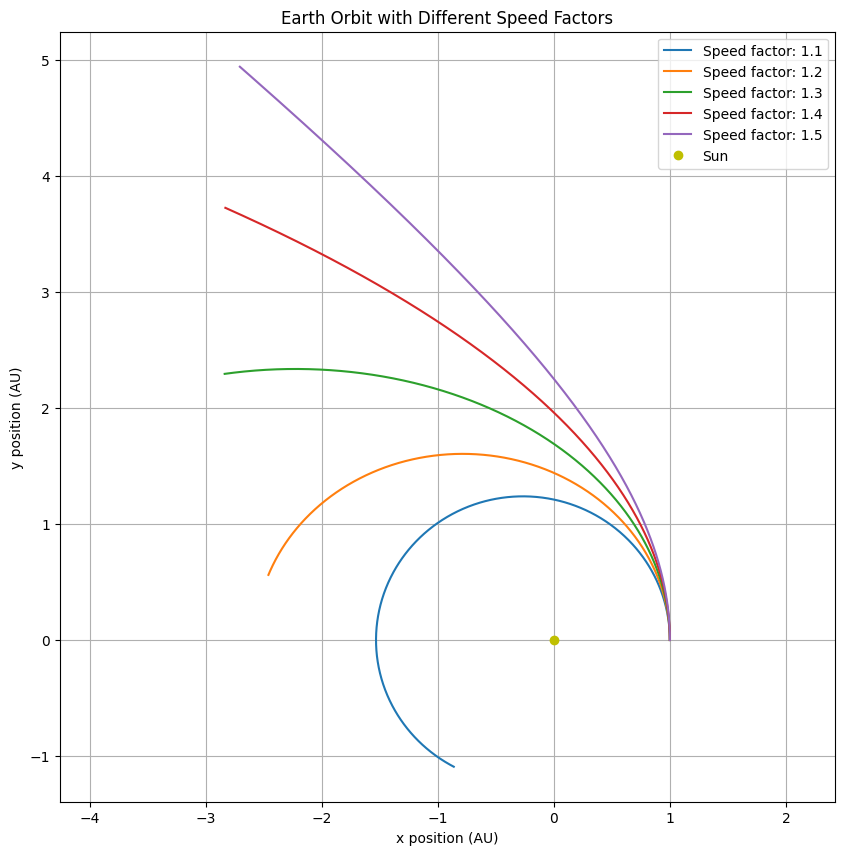

In [8]:
import numpy as np
import matplotlib.pyplot as plt

G = 4 * np.pi**2
M_sun = 1
M_earth = 3.003e-6
AU = 1
year = 1

r_earth = np.array([1, 0])
v_earth = np.array([0, 2 * np.pi])

dt = 0.001
n_steps = int(1/dt)

def simulate_orbit(r_earth, v_earth, M_sun, G, dt, n_steps, speed_factor):
    x = np.zeros((n_steps, 2))
    v = np.zeros((n_steps, 2))

    x[0, :] = r_earth
    v[0, :] = v_earth * speed_factor

    r = np.linalg.norm(x[0, :])
    a = -G * M_sun * x[0, :] / r**3
    v_half = v[0, :] + 0.5 * dt * a

    for i in range(n_steps - 1):
        x[i + 1, :] = x[i, :] + dt * v_half
        r = np.linalg.norm(x[i + 1, :])
        a = -G * M_sun * x[i + 1, :] / r**3
        v_half += dt * a

    return x

plt.figure(figsize=(10, 10))
for speed_factor in [1.1, 1.2, 1.3, 1.4, 1.5]:
    orbit = simulate_orbit(r_earth, v_earth, M_sun, G, dt, n_steps, speed_factor)
    plt.plot(orbit[:, 0], orbit[:, 1], label=f'Speed factor: {speed_factor}')

plt.plot(0, 0, 'yo', label='Sun')

plt.xlabel('x position (AU)')
plt.ylabel('y position (AU)')
plt.title('Earth Orbit with Different Speed Factors')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()